<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

In this project we will  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.


### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --us


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

ambiguous option: --us (--use-deprecated, --use-feature, --use-pep517, --user?)


In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Time related functions.
import time

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE


# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

from sklearn.metrics import roc_curve, roc_auc_score


import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.regularizers import l2


# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
ds = pd.read_csv("/content/Churn.csv")

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
# let's view the first 5 rows of the data
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
# let's view the last 5 rows of the data
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


### Understand the shape of the dataset

In [ ]:
ds.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns

### Check the data types of the columns for the dataset

In [ ]:
# let's check the data types of the columns in the dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* 11 variables are numerical and only 3 variables are object types.
* No columns have missing values.

### Checking the Statistical Summary

In [ ]:
# let's view the statistical summary of the numerical columns in the data
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


* RowNumber :  RowNumber being a unique identifier doesn't add any meaning to the analysis and can be dropped.
* CustomerId : CustomerId being a unique identifier doesn't add any meaning to the analysis and can be dropped.
* CreditScore : The minimum credit score is 350 and the maximum is 850.
* Age : Age of a customer is a minimum of 18 and a maximum of 92. 75% of the customers' ages are within 44 years.
* Tenure : Tenure is a maximum of 0 and a maximum of 10.
* Balance : There are a few customers whose account balance is pretty high.
* NumOfProducts : Minimum 1 and maximum 4 number of products that a customer has purchased through the bank.
* HasCrCard : 75% of the customers have a credit card.
* IsActiveMember : 75% of the customers are active members of the bank ( Active members in the sense, of using bank products regularly, making transactions etc ).
* EstimatedSalary : The maximum estimated salary of a customer is 11 and the maximum is around 200000
* Exited : 75% of the customers did not leave the bank within six months.

### Checking for Missing Values

In [ ]:
#Calculating the total number of nan values for each columns.
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There are no missing values in the dataset.

### Checking for unique values for each of the column

In [ ]:
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
data=ds.copy()

In [ ]:
#RowNumber and CustomerId are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId'], axis=1)

In [ ]:
#surname will not add any value to the analysis  so dropping it.
ds = ds.drop(['Surname'], axis=1)

### Checking for duplicate values

In [ ]:
# Let's check for duplicate values in the data
ds.duplicated().sum()

0

* There are no duplicate values in the dataset.


## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

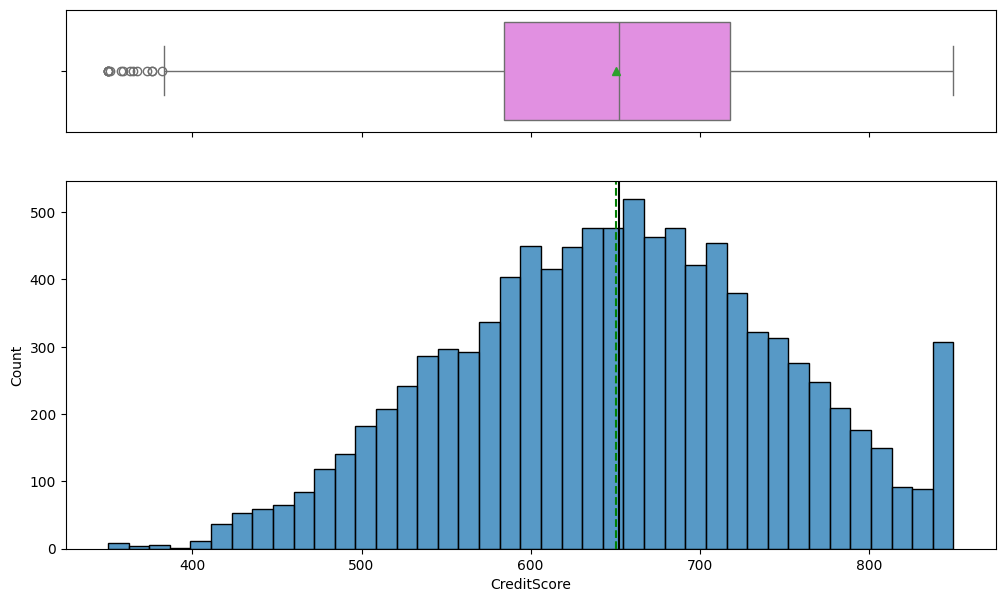

In [ ]:
histogram_boxplot(ds,'CreditScore')
plt.savefig("output.jpg", bbox_inches='tight')

* Credit score has left-skewed distribution.
* Most of the customers' credit score is within 700.
* As evident from the boxplot, there are a few outliers in the lower quartile of the distribution.

#### Observations on Age

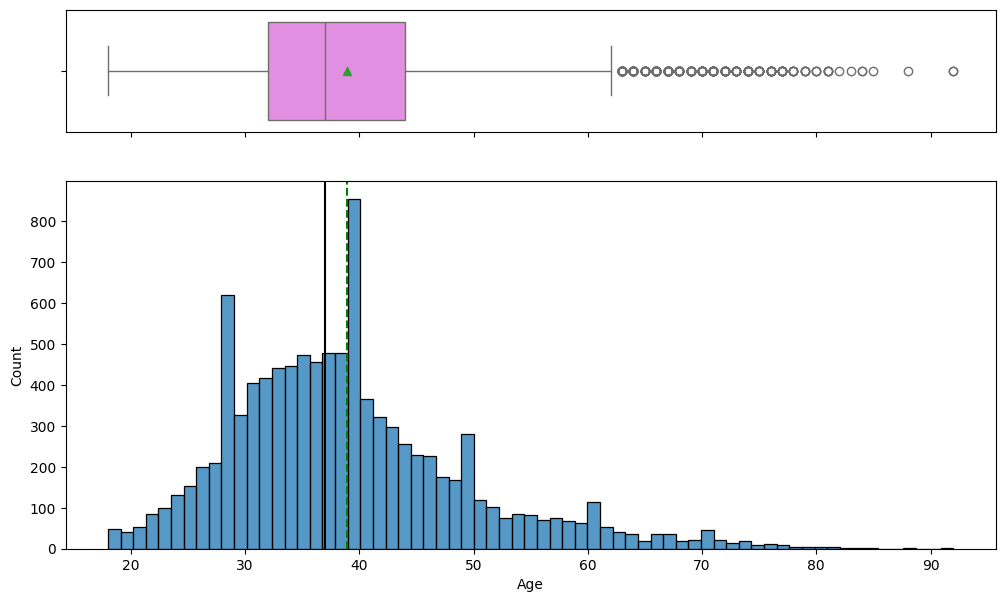

In [ ]:
histogram_boxplot(ds,'Age')
plt.savefig("output.jpg", bbox_inches='tight')

* Customer_Age has a right-skewed distribution.
* As evident from the boxplot, there are lots of outliers in the upper quartile of the distribution for this variable.


#### Observations on Balance

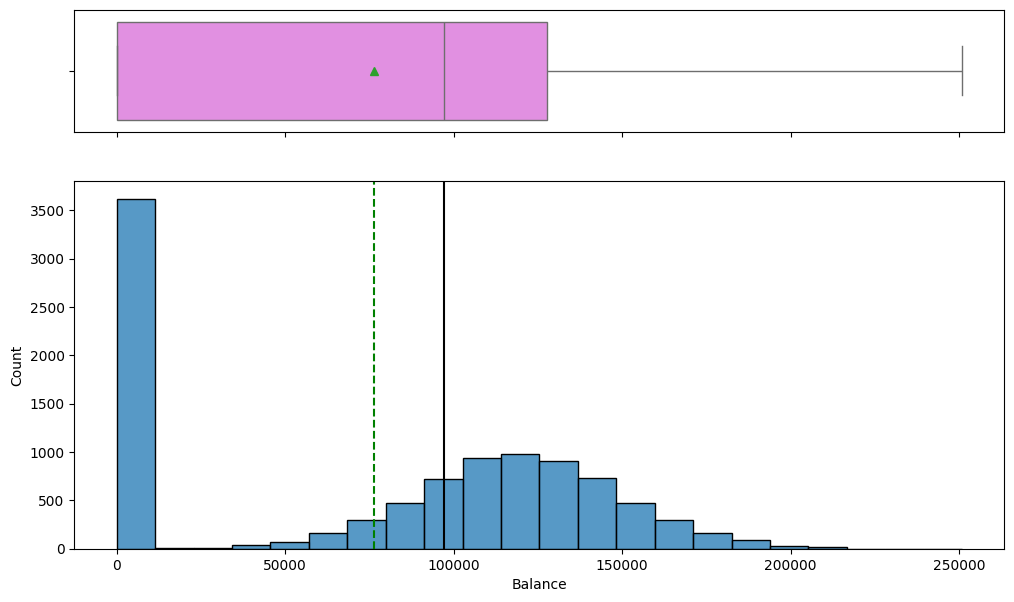

In [ ]:
histogram_boxplot(ds,'Balance')
plt.savefig("output.jpg", bbox_inches='tight')

* More than 3500 customers have zero account balance.
* In remaining customers most of them have account balance in between 100000 to 150000.
* There are no outliers present in the graph.

#### Observations on Estimated Salary

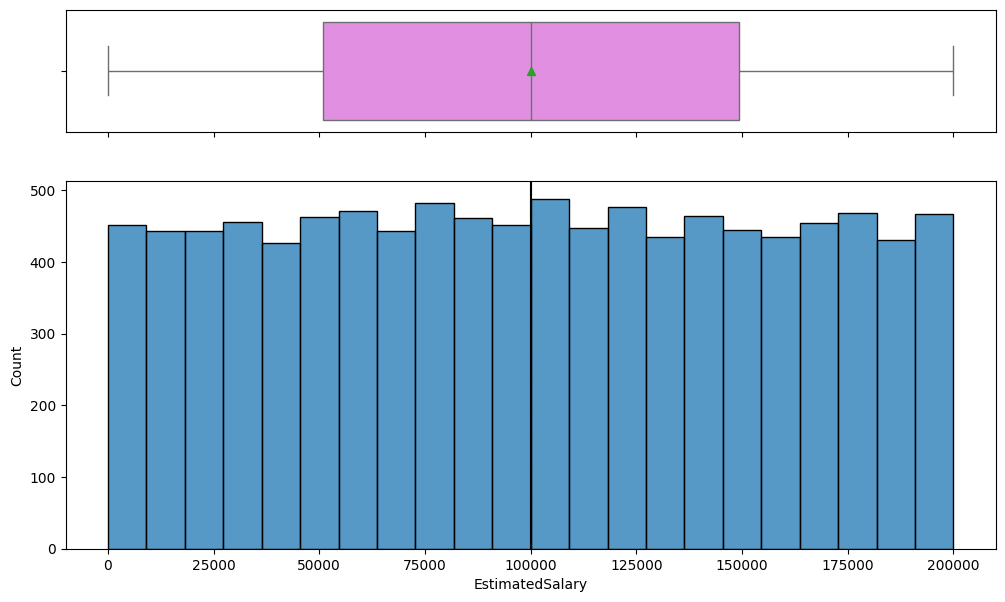

In [ ]:
histogram_boxplot(ds,'EstimatedSalary')
plt.savefig("output.jpg", bbox_inches='tight')

* Estimated salary has an approx. symmetric distribution with mean and median equal to 100000.
* There are no outliers.

#### Observations on Exited

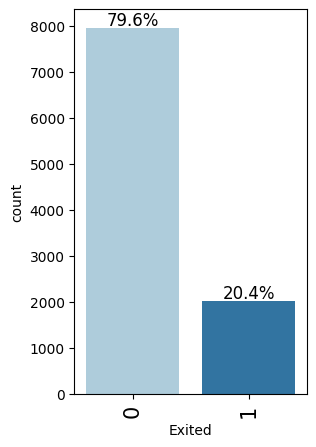

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(ds, "Exited", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* Around 80% of the customers did not leave the bank and 20% left the bank within 6 months.

#### Observations on Geography

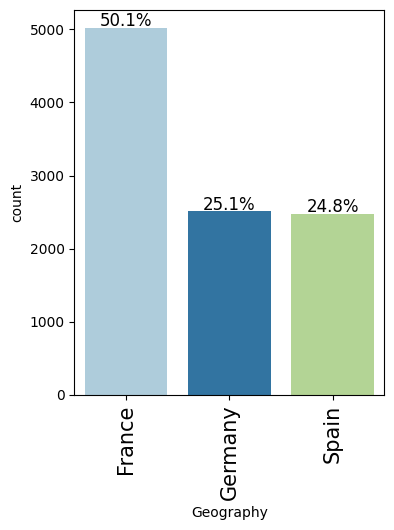

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(ds, "Geography", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* Around 50% of the customers came from France, followed by 25% and 25% came from Germany and Spain.

#### Observations on Gender

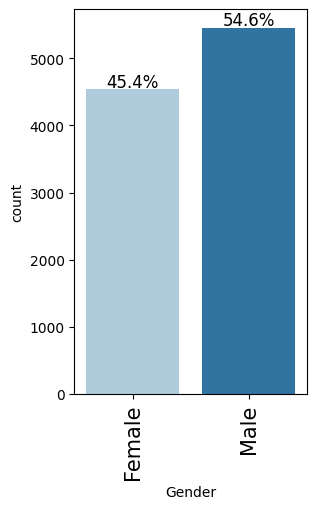

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(ds, "Gender", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* 55% of the customers are male and 45% of them are female.

#### Observations on Tenure

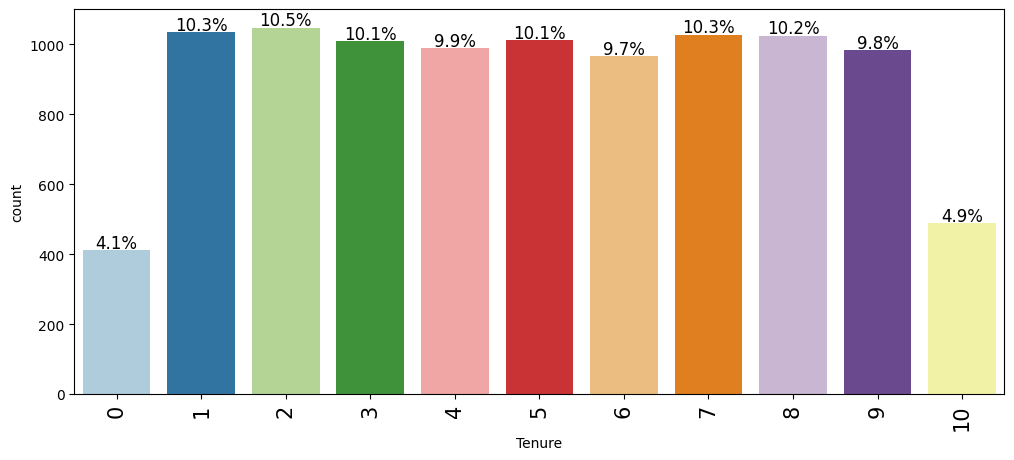

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(ds, "Tenure", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* The percentage of customers are least tenure 0 and 10.

#### Observations on Number of Products

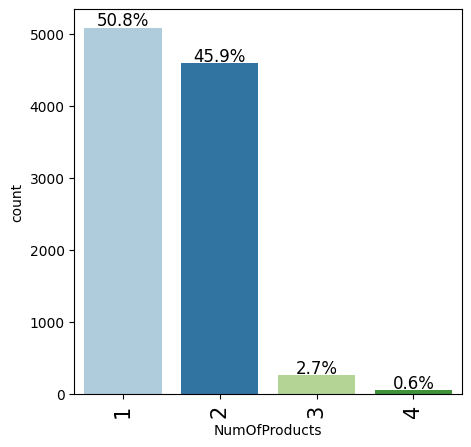

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(ds, "NumOfProducts", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* Most of the customers have 1 and 2 number of products that a customer has purchased through the bank.

#### Observations on Has Credit Card

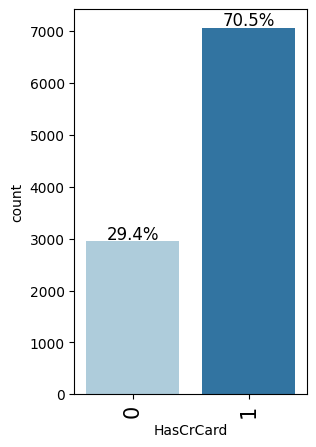

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(ds, "HasCrCard", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* Around 71% of customers have credit cards.

#### Observations on Is Active Member

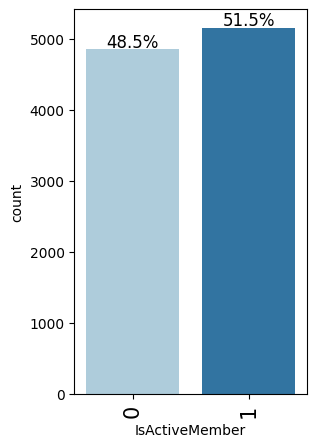

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(ds, "IsActiveMember", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

*52% of the customers are active members of the bank and 48% of them are not active members.

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [ ]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

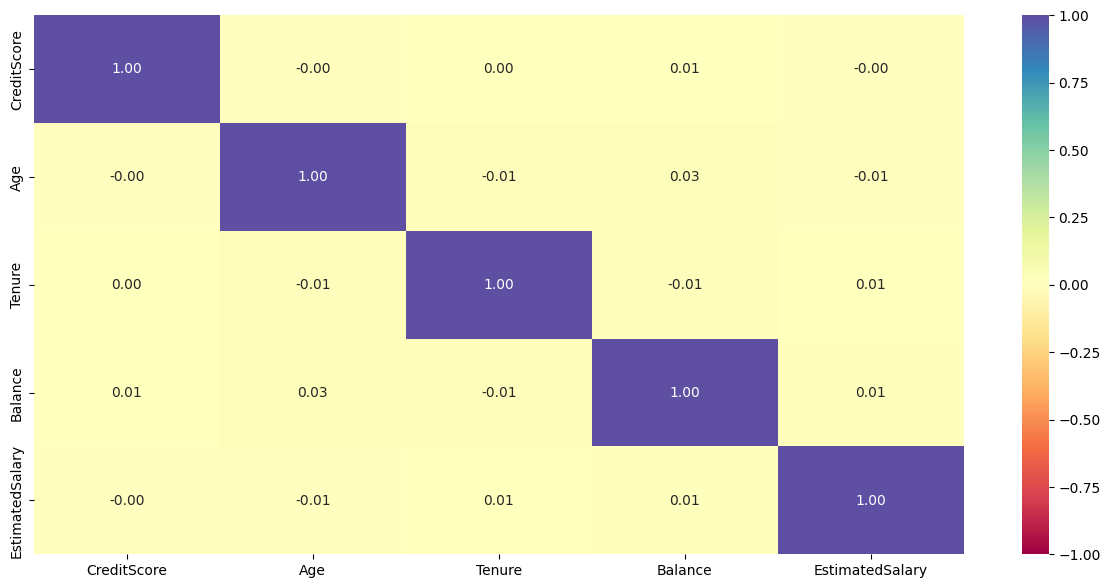

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no strong correlation between the variables.
* Let's analyze it further.

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


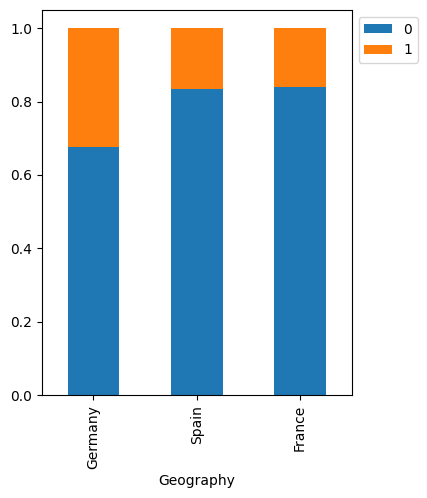

<Figure size 640x480 with 0 Axes>

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )
plt.savefig("output.jpg", bbox_inches='tight')

* 33% of the customers who came from Germany have left the bank, followed by 16% and 17% from France and Spain respectively.

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


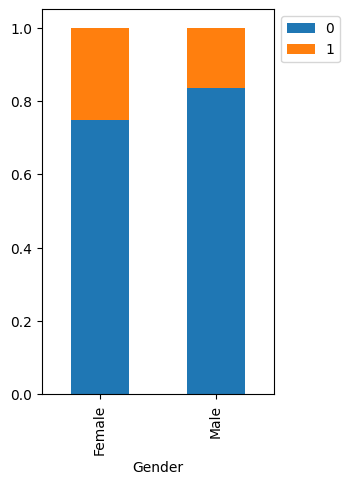

<Figure size 640x480 with 0 Axes>

In [ ]:
stacked_barplot(ds, "Gender", "Exited" )
plt.savefig("output.jpg", bbox_inches='tight')

* 25% of the female and 20% of the male customers have exited.

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


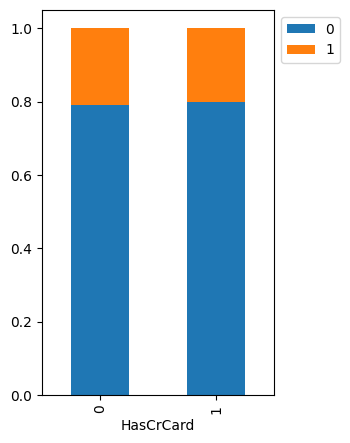

<Figure size 640x480 with 0 Axes>

In [ ]:
stacked_barplot(ds, "HasCrCard", "Exited" )
plt.savefig("output.jpg", bbox_inches='tight')

* There is no visible change in  the number of exited customers depending on the credit card.

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


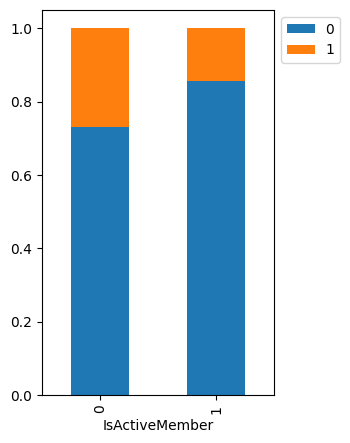

<Figure size 640x480 with 0 Axes>

In [ ]:
stacked_barplot(ds, "IsActiveMember", "Exited" )
plt.savefig("output.jpg", bbox_inches='tight')

* 27% of the customers who are not active members and 14% of the customers who are active members have left the bank.

#### Exited Vs Credit Score

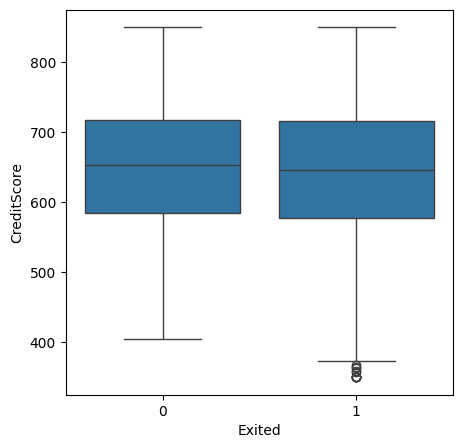

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

* The credit score does not have a significant impact on Exited customers. But from the boxplot, we can see that few customers are having lower credit scores prefer to leave the bank.

#### Exited Vs Age

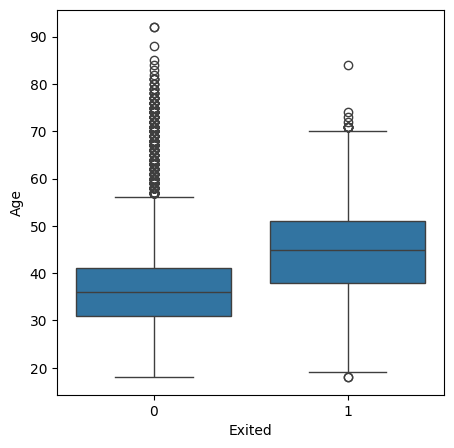

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

* The median age is higher for the exited customers as compared to the customers who did not leave the bank.
* Most of the customers in the higher age group prefer to stay with the bank.

#### Exited Vs Tenure

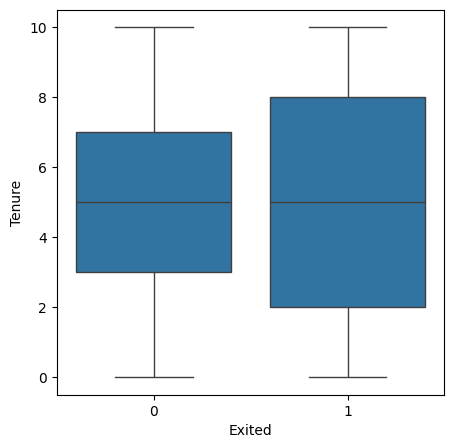

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

* For the Exited Customers the variance of Tenure is more as compared to the not exited Customers.

#### Exited Vs Balance

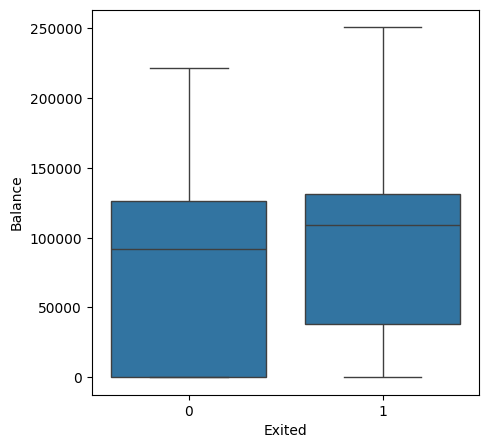

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

* Customers with a higher account balance would be more likely to be Exited as compared to the customers with a lower account balance.



#### Exited Vs Number of Products

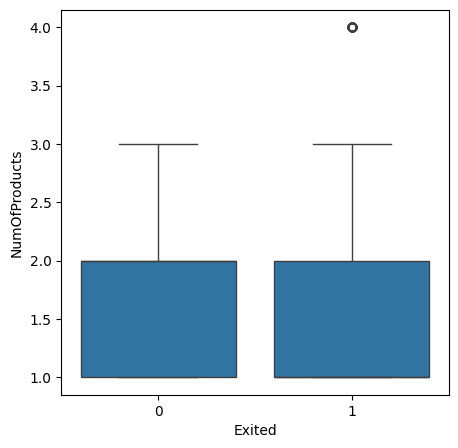

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

* The NumOfProducts does not vary based on the Exited.

#### Exited Vs Estimated Salary

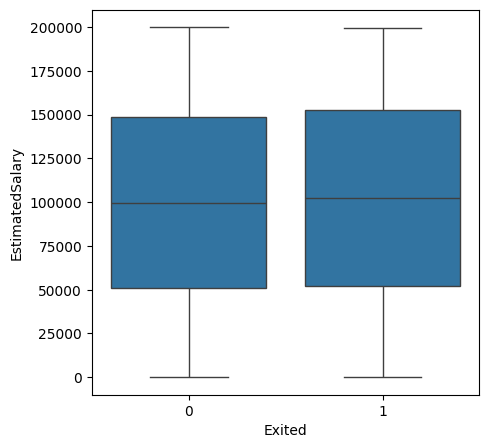

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

* Estimated Salary do not have much impact on whether a customer will leave the bank or stay.


## Data Preprocessing

### Outlier Detection

In [ ]:
# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])
Q1 = numeric_data.quantile(0.25)  # To find the 25th percentile
Q3 = numeric_data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

RowNumber          0.000
CustomerId         0.000
CreditScore        0.150
Age                3.590
Tenure             0.000
Balance            0.000
NumOfProducts      0.600
HasCrCard          0.000
IsActiveMember     0.000
EstimatedSalary    0.000
Exited            20.370
dtype: float64

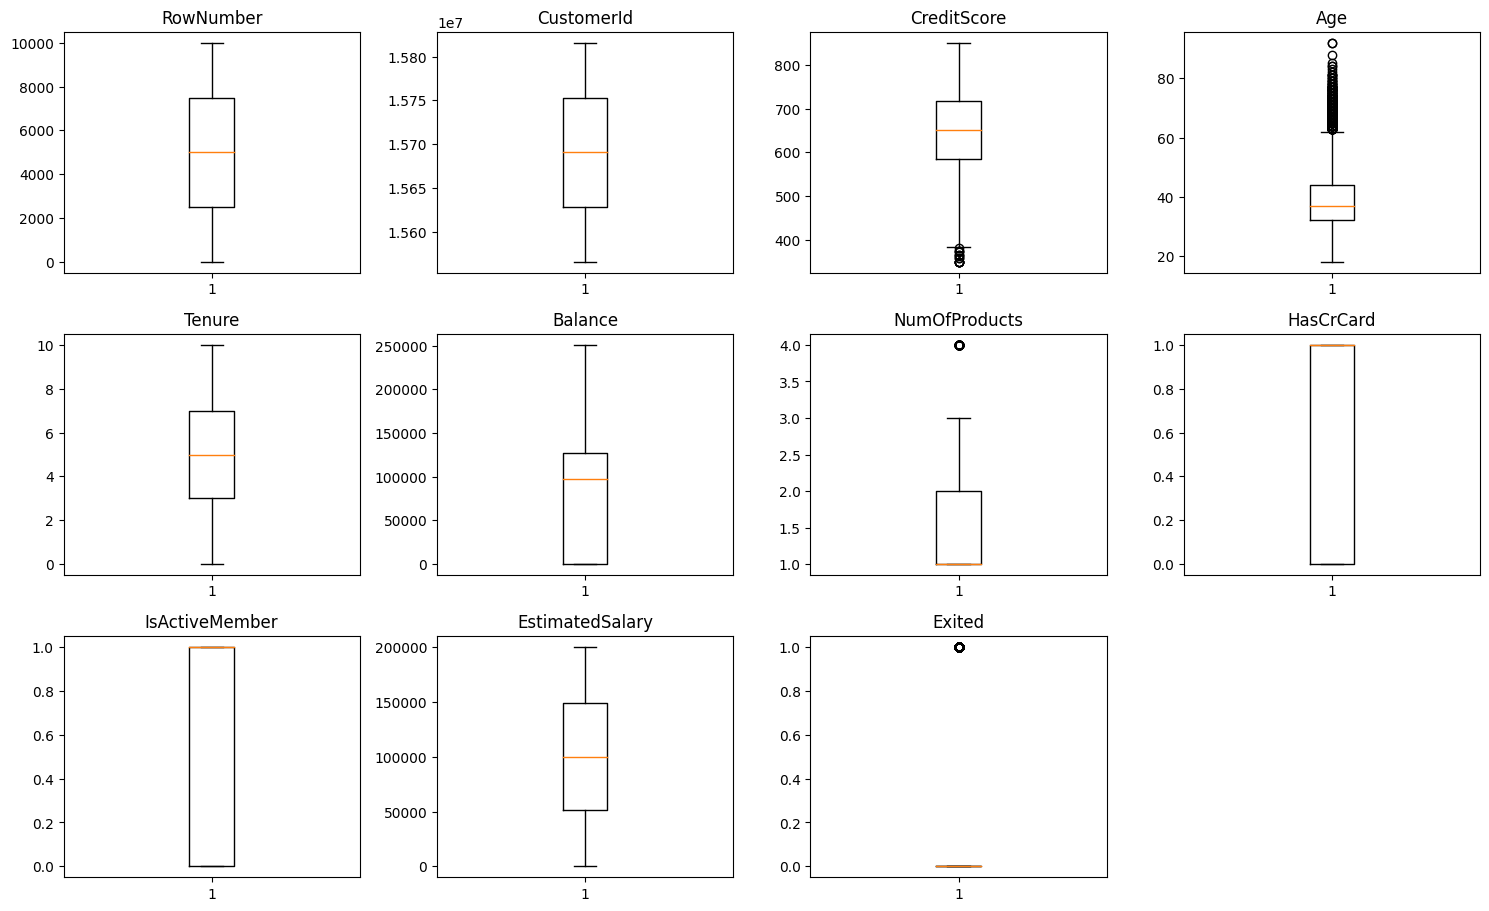

In [ ]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* The ouliers can be valid values for the columns. So we will not treat them as outliers.

### Dummy Variable Creation

In [ ]:

ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)

In [ ]:
ds.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

### Train-validation-test Split

In [ ]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [ ]:
# Splitting data into training, validation and test set:
# Splitting the dataset into the Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)

In [ ]:
# Splitting the dataset into the Training and Validation set.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [ ]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)


(6400, 11) (6400,)
(1600, 11) (1600,)
(2000, 11) (2000,)


### Utility functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

### Data Normalization

In [ ]:
# creating an instance of the standard scaler
sc = StandardScaler()
#Standardizing the numerical variables to zero mean and unit variance.
X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

## Model Building

### Model Evaluation Criterion

Model can make wrong predictions as:

* Predicting a customer will leave and the customer does not leave.
* Predicting a customer will not leave and the customer leaves.

Which case is more important?

* Predicting that customer will not leave but he leaves i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

* Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of leaving the bank.

**Let's create a function for plotting the confusion matrix**

In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Let's create two blank dataframes that will store the recall values for all the models we build.**

In [ ]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

**As we have are dealing with an imbalance in class distribution, we will be using class weights to allow the model to give proportionally more importance to the minority class.**

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

### Neural Network with SGD Optimizer

Let's start with a neural network consisting of
* two hidden layers with 32 and 16 neurons respectively
* activation function of ReLU.
* SGD as the optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_0 = Sequential()
model_0.add(Dense(32,activation="relu",input_dim=X_train.shape[1]))
model_0.add(Dense(16,activation="relu"))
model_0.add(Dense(1,activation="sigmoid"))

In [ ]:
 # defining SGD as the optimizer to be used
optimizer = tf.keras.optimizers.SGD()
model_0.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
#Fitting the ANN
#,class_weight=cw_dict
history_0 = model_0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=16, epochs=25)
end=time.time()

Epoch 1/25
400/400 [==============================] - 2s 4ms/step - loss: 0.5154 - val_loss: 0.4660
Epoch 2/25
400/400 [==============================] - 1s 3ms/step - loss: 0.4594 - val_loss: 0.4502
Epoch 3/25
400/400 [==============================] - 1s 2ms/step - loss: 0.4455 - val_loss: 0.4427
Epoch 4/25
400/400 [==============================] - 1s 2ms/step - loss: 0.4380 - val_loss: 0.4383
Epoch 5/25
400/400 [==============================] - 1s 2ms/step - loss: 0.4328 - val_loss: 0.4354
Epoch 6/25
400/400 [==============================] - 1s 2ms/step - loss: 0.4298 - val_loss: 0.4332
Epoch 7/25
400/400 [==============================] - 1s 2ms/step - loss: 0.4275 - val_loss: 0.4316
Epoch 8/25
400/400 [==============================] - 1s 2ms/step - loss: 0.4254 - val_loss: 0.4305
Epoch 9/25
400/400 [==============================] - 1s 2ms/step - loss: 0.4236 - val_loss: 0.4295
Epoch 10/25
400/400 [==============================] - 1s 2ms/step - loss: 0.4219 - val_loss: 0.4287

**Loss Function**

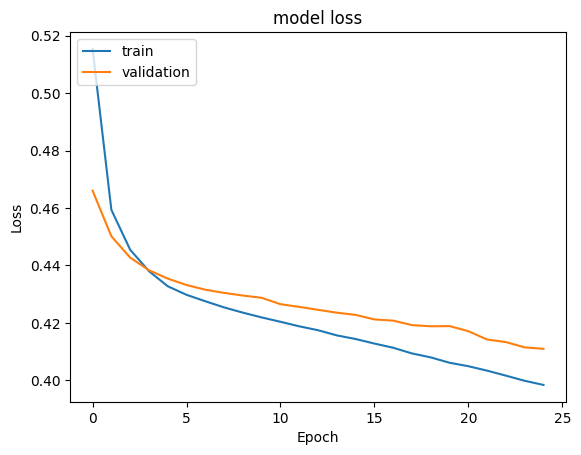

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_0_train_perf = model_performance_classification(model_0, X_train, y_train)
model_0_train_perf

200/200 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.828,0.828,0.809,0.803


In [ ]:
model_0_valid_perf = model_performance_classification(model_0, X_val, y_val)
model_0_valid_perf

50/50 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.821,0.821,0.798,0.790


**Classification report**

In [ ]:
#classification report for training data
cr=classification_report(y_train,y_train_pred>0.5)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5096
           1       0.67      0.31      0.43      1304

    accuracy                           0.83      6400
   macro avg       0.76      0.64      0.66      6400
weighted avg       0.81      0.83      0.80      6400



In [ ]:

#classification report for validation set
cr = classification_report(y_val,y_val_pred>0.5)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1274
           1       0.64      0.27      0.38       326

    accuracy                           0.82      1600
   macro avg       0.74      0.62      0.64      1600
weighted avg       0.80      0.82      0.79      1600



**Confusion matrix**

Confusion matrix - Train Data



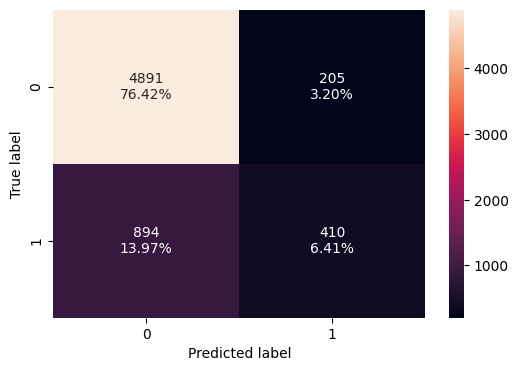

In [ ]:
print("Confusion matrix - Train Data",end="\n\n")
make_confusion_matrix(y_train, y_train_pred)

Confusion matrix - Validation Data



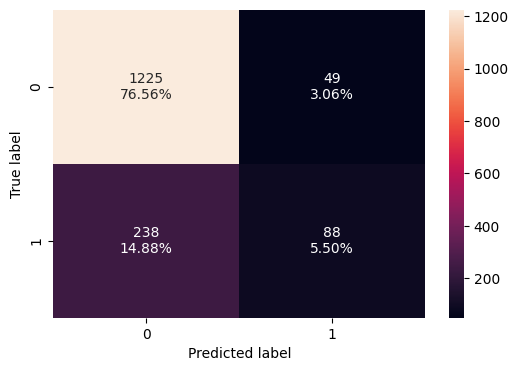

In [ ]:
print("Confusion matrix - Validation Data",end="\n\n")
make_confusion_matrix(y_val,y_val_pred>0.5)

* Train Recall score of ~0.84 and test F1 score of ~0.83 indicate consistent performance of the model between training and testing datasets.

* Even though it's a good score, the rate of improvement over the epochs is still low.

## Model Performance Improvement

### Neural Network with Adam Optimizer


* Let's change the optimizer to Adam. This will introduce momentum as well as an adaptive learning rate.
* Let's initialize the weights using He normal.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64, activation='relu',kernel_initializer='he_normal',input_dim = X_train.shape[1]))
model_1.add(Dense(32,kernel_initializer='he_normal',activation="relu"))
model_1.add(Dense(16,kernel_initializer='he_normal',activation="relu"))
#model.add(Dense(8,kernel_initializer='he_normal',activation="relu"))
model_1.add(Dense(1,kernel_initializer='he_normal',activation="sigmoid"))

In [ ]:
optimizer = tf.keras.optimizers.Adam()   # defining Adam as the optimizer to be used
model_1.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
#Fitting the ANN
history_1  = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=64, epochs=50)

end=time.time()

Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 0.4544 - val_loss: 0.4282
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4140 - val_loss: 0.4171
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3991 - val_loss: 0.4085
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3899 - val_loss: 0.4077
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3796 - val_loss: 0.3994
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3724 - val_loss: 0.3925
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3664 - val_loss: 0.3849
Epoch 8/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3597 - val_loss: 0.3857
Epoch 9/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3547 - val_loss: 0.3843
Epoch 10/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3519 - val_loss: 0.3827

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Loss function**

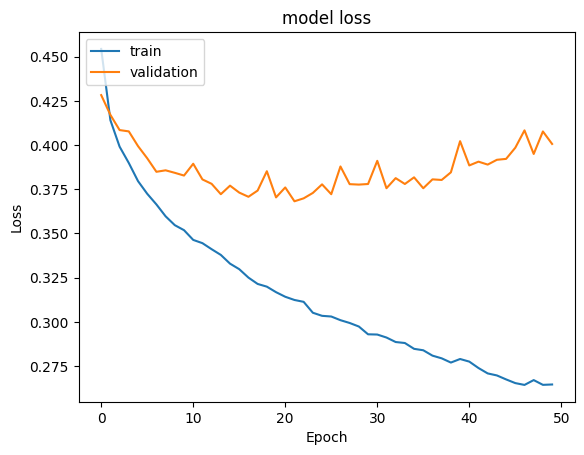

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_1_train_perf = model_performance_classification(model_1, X_train, y_train)
model_1_train_perf

200/200 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.894,0.894,0.890,0.888


In [ ]:
model_1_valid_perf = model_performance_classification(model_1, X_val, y_val)
model_1_valid_perf


50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.845,0.845,0.832,0.833


In [ ]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#classification report for training data
cr=classification_report(y_train,y_train_pred>0.5)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5096
           1       0.82      0.62      0.70      1304

    accuracy                           0.89      6400
   macro avg       0.86      0.79      0.82      6400
weighted avg       0.89      0.89      0.89      6400



In [ ]:
#classification report for validation set
cr = classification_report(y_val,y_val_pred>0.5)
print(cr)


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1274
           1       0.68      0.45      0.54       326

    accuracy                           0.84      1600
   macro avg       0.78      0.70      0.73      1600
weighted avg       0.83      0.84      0.83      1600



**Confusion matrix**

Confusion matrix - Train Data



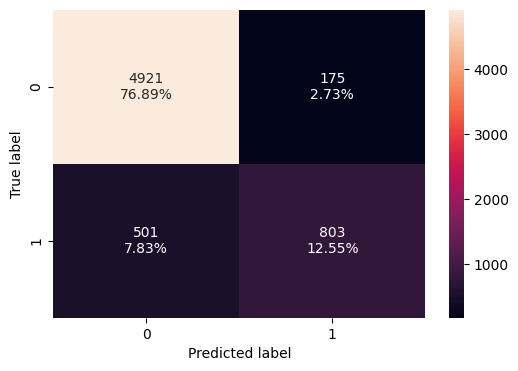

In [ ]:
print("Confusion matrix - Train Data",end="\n\n")
make_confusion_matrix(y_train, y_train_pred)

Confusion matrix - Validation Data



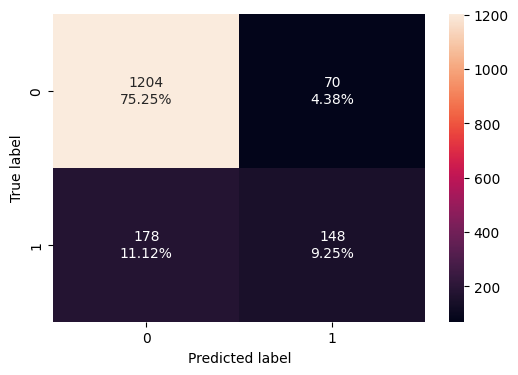

In [ ]:

print("Confusion matrix - Validation Data",end="\n\n")
make_confusion_matrix(y_val,y_val_pred>0.5)

* Neural Network with Adam Optimizer model has increased the training and validation performance but the difference between training and validation recall has also increased.
* Let's add dropout to regularize it.

### Neural Network with Adam Optimizer and Dropout

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_2 = Sequential()
model_2.add(Dense(32, activation='relu',kernel_initializer='he_normal',input_dim = X_train.shape[1]))
model_2.add(Dropout(0.2))
model_2.add(Dense(16,kernel_initializer='he_normal',activation="relu"))
model_2.add(Dense(4,kernel_initializer='he_normal',activation="relu"))
#model_2.add(Dropout(0.1))
model_2.add(Dense(8,kernel_initializer='he_normal',activation="relu"))
model_2.add(Dense(1,kernel_initializer='he_normal',activation="sigmoid"))
model_2.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
 dense_3 (Dense)             (None, 8)                 40        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1029 (4.02 KB)
Trainable params: 1029 (4.0

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
metric = keras.metrics.Recall()
model_2.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=64, epochs=50)
end=time.time()

Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 0.5768 - val_loss: 0.5005
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4930 - val_loss: 0.4663
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4644 - val_loss: 0.4424
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4472 - val_loss: 0.4331
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4418 - val_loss: 0.4281
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4367 - val_loss: 0.4249
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4288 - val_loss: 0.4223
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4303 - val_loss: 0.4217
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4224 - val_loss: 0.4219
Epoch 10/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4263 - val_loss: 0.4247

**Loss function**

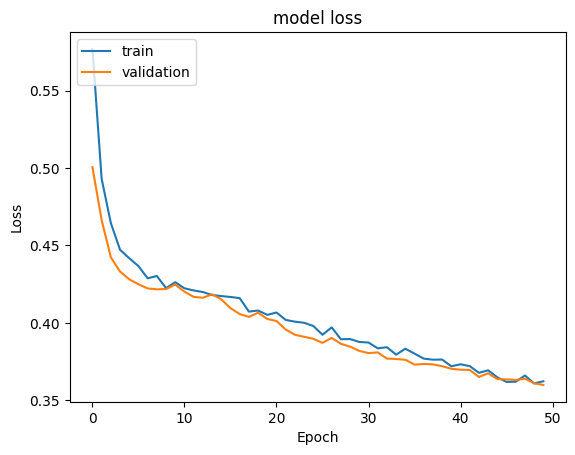

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* From the above plot, we can observe that the train and validation curves have relatively smooth lines as compared to the previous case. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_2_train_perf = model_performance_classification(model_2, X_train, y_train)
model_2_train_perf

200/200 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.863,0.863,0.854,0.851


In [ ]:
model_2_valid_perf = model_performance_classification(model_2, X_val, y_val)
model_2_valid_perf


50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.856,0.856,0.845,0.841


**Classification report**

In [ ]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5096
           1       0.76      0.48      0.59      1304

    accuracy                           0.86      6400
   macro avg       0.82      0.72      0.75      6400
weighted avg       0.85      0.86      0.85      6400



In [ ]:
#classification report for validation set
cr = classification_report(y_val,y_val_pred>0.5)
print(cr)


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1274
           1       0.74      0.44      0.56       326

    accuracy                           0.86      1600
   macro avg       0.81      0.70      0.74      1600
weighted avg       0.85      0.86      0.84      1600



**Confusion Matrix**

Confusion matrix - Train Data



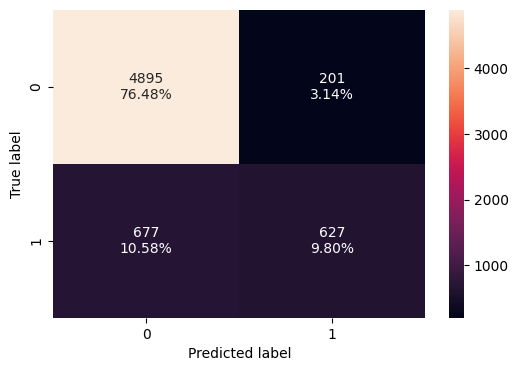

In [ ]:
print("Confusion matrix - Train Data",end="\n\n")
make_confusion_matrix(y_train, y_train_pred)


Confusion matrix - Validation Data



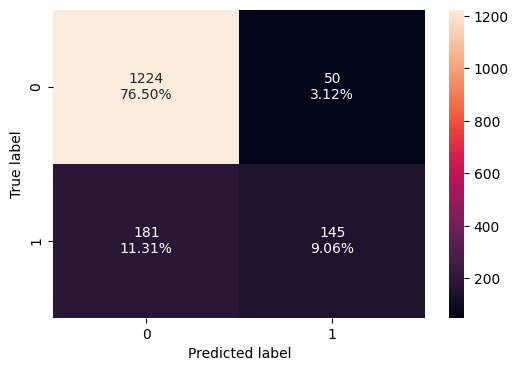

In [ ]:
print("Confusion matrix - Validation Data",end="\n\n")
make_confusion_matrix(y_val,y_val_pred>0.5)



* Neural Network with Adam Optimizer and Dropout model has increased the performance of the training and validation set and the training and validation recall values are very close. That means this model generalizes well in the unseen data.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

* Let's try a network by applying SMOTE to deal with the imbalance in class distribution.
* We are using SGD as an optimizer with learning rate and momentum as hyperparameters and we will tune them accordingly.


In [ ]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



Let's build a model with the balanced dataset

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_3 = Sequential()
model_3.add(Dense(64, activation='relu',kernel_initializer='he_normal',input_dim = X_train_smote.shape[1]))
model_3.add(Dense(32,kernel_initializer='he_normal',activation="relu"))
model_3.add(Dense(16,kernel_initializer='he_normal',activation="relu"))
model_3.add(Dense(8,kernel_initializer='he_normal',activation="relu"))
model_3.add(Dense(1,kernel_initializer='he_normal',activation="sigmoid"))

In [ ]:
# defining SGD as the optimizer to be used
optimizer = tf.keras.optimizers.SGD(momentum=0.9,learning_rate=0.0001)
model_3.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
#Fitting the ANN
history_3 = model_3.fit(X_train_smote, y_train_smote, validation_data=(X_val, y_val), batch_size=64, epochs=70)
end=time.time()


Epoch 1/70
160/160 [==============================] - 2s 4ms/step - loss: 0.7240 - val_loss: 0.6261
Epoch 2/70
160/160 [==============================] - 1s 3ms/step - loss: 0.7031 - val_loss: 0.6383
Epoch 3/70
160/160 [==============================] - 0s 2ms/step - loss: 0.6927 - val_loss: 0.6438
Epoch 4/70
160/160 [==============================] - 0s 2ms/step - loss: 0.6860 - val_loss: 0.6448
Epoch 5/70
160/160 [==============================] - 0s 2ms/step - loss: 0.6807 - val_loss: 0.6439
Epoch 6/70
160/160 [==============================] - 0s 2ms/step - loss: 0.6761 - val_loss: 0.6431
Epoch 7/70
160/160 [==============================] - 0s 2ms/step - loss: 0.6717 - val_loss: 0.6416
Epoch 8/70
160/160 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6387
Epoch 9/70
160/160 [==============================] - 0s 2ms/step - loss: 0.6628 - val_loss: 0.6358
Epoch 10/70
160/160 [==============================] - 0s 2ms/step - loss: 0.6583 - val_loss: 0.6330

**Loss Function**

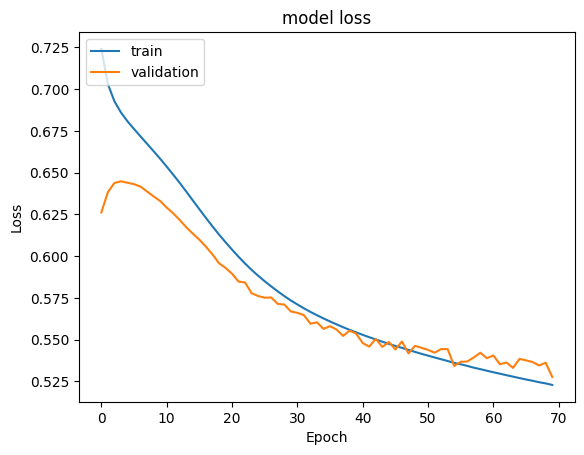

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train_smote, y_train_smote)
model_3_train_perf

319/319 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.744,0.744,0.744,0.743


In [ ]:
model_3_valid_perf = model_performance_classification(model_3, X_val, y_val)
model_3_valid_perf


50/50 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.739,0.739,0.795,0.757


**Classification Report**

In [ ]:
#classification report for training data
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      5096
           1       0.75      0.73      0.74      5096

    accuracy                           0.74     10192
   macro avg       0.74      0.74      0.74     10192
weighted avg       0.74      0.74      0.74     10192



In [ ]:

#classification report for validation set
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1274
           1       0.41      0.64      0.50       326

    accuracy                           0.74      1600
   macro avg       0.65      0.70      0.66      1600
weighted avg       0.79      0.74      0.76      1600



**Confusion Matrix**

Confusion matrix - Train Data



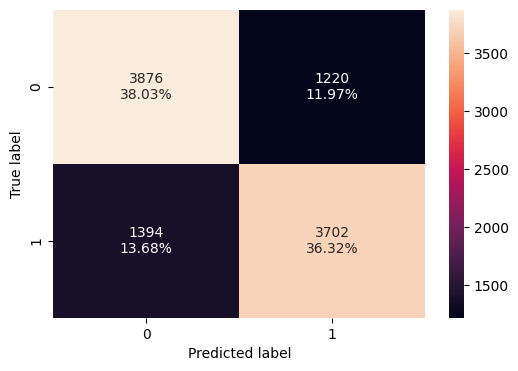

In [ ]:

print("Confusion matrix - Train Data",end="\n\n")
make_confusion_matrix(y_train_smote, y_train_pred)

Confusion matrix - Validation Data



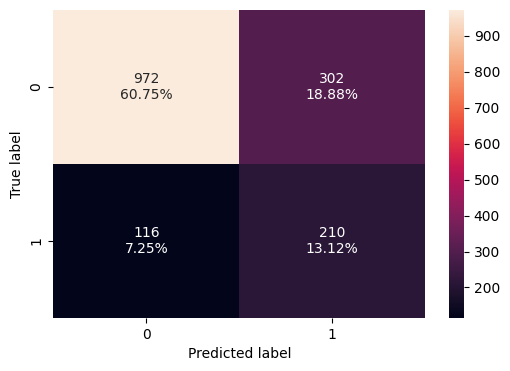

In [ ]:
print("Confusion matrix - Validation Data",end="\n\n")
make_confusion_matrix(y_val,y_val_pred)


* Neural Network with Balanced Data (by applying SMOTE) and SGD optimizer deteriorated the training and validation performances though it generalizes well.  

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

*  Let's try a network by applying SMOTE but this time we are using Adam optimizer.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_4 = Sequential()
model_4.add(Dense(64, activation='relu',kernel_initializer='he_normal',input_dim = X_train_smote.shape[1]))
model_4.add(Dense(32,kernel_initializer='he_normal',activation="relu"))
#model_4.add(Dense(16,kernel_initializer='he_normal',activation="relu"))
#model_4.add(Dense(8,kernel_initializer='he_normal',activation="relu"))
model_4.add(Dense(1,kernel_initializer='he_normal',activation="sigmoid"))

In [ ]:
optimizer = tf.keras.optimizers.Adam()   # defining Adam as the optimizer to be used
model_4.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
# Train the model
history_4 = model_4.fit(X_train_smote, y_train_smote, validation_data=(X_val, y_val), batch_size=128, epochs=100)
end=time.time()

Epoch 1/100
80/80 [==============================] - 1s 4ms/step - loss: 0.6019 - val_loss: 0.5577
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5339 - val_loss: 0.5393
Epoch 3/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5130 - val_loss: 0.5107
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4963 - val_loss: 0.5330
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4823 - val_loss: 0.5021
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4685 - val_loss: 0.4803
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4573 - val_loss: 0.4601
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4481 - val_loss: 0.4396
Epoch 9/100
80/80 [==============================] - 0s 3ms/step - loss: 0.4423 - val_loss: 0.4945
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4325 - val_loss: 0.4531
Epoch 11/

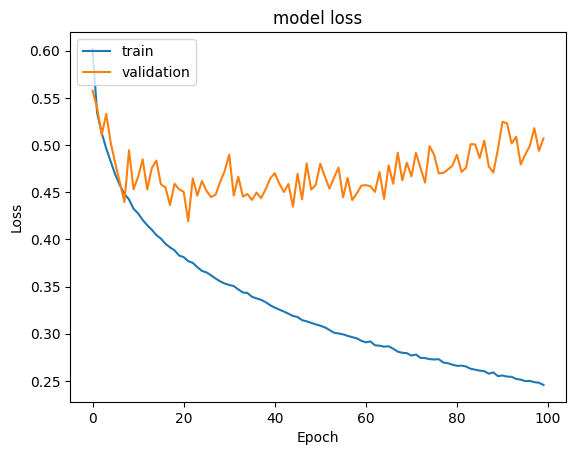

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model_4_train_perf = model_performance_classification(model_4, X_train_smote, y_train_smote)
model_4_train_perf

319/319 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.905,0.905,0.905,0.905


In [ ]:
model_4_valid_perf = model_performance_classification(model_4, X_val, y_val)
model_4_valid_perf


50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.795,0.795,0.814,0.803


In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_4.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

**Classification Report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      5096
           1       0.90      0.91      0.91      5096

    accuracy                           0.91     10192
   macro avg       0.91      0.91      0.91     10192
weighted avg       0.91      0.91      0.91     10192



In [ ]:
#classification report for validation set
cr = classification_report(y_val,y_val_pred>0.5)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1274
           1       0.50      0.61      0.55       326

    accuracy                           0.80      1600
   macro avg       0.70      0.73      0.71      1600
weighted avg       0.81      0.80      0.80      1600



**Confusion Matrix**

Confusion matrix - Train Data



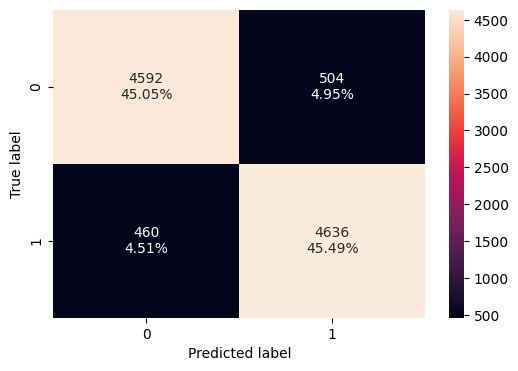

In [ ]:
print("Confusion matrix - Train Data",end="\n\n")
make_confusion_matrix(y_train_smote, y_train_pred)


Confusion matrix - Validation Data



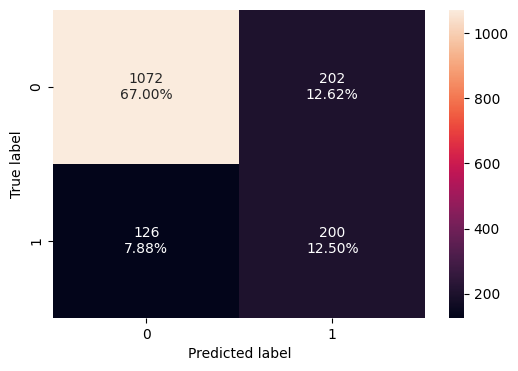

In [ ]:
print("Confusion matrix - Validation Data",end="\n\n")
make_confusion_matrix(y_val,y_val_pred>0.5)


*  Neural Network by applying SMOTE and Adam optimizer instead of SGD optimizer has increased both training and validation recall scores but the difference in both the values is quite high means the model is overfitting.
* Let's add dropout and batch regularization to regularize it.


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_5 = Sequential()
model_5.add(Dense(64, activation='relu',kernel_initializer='he_normal',input_dim = X_train_smote.shape[1]))
model_5.add(Dropout(0.4))
model_5.add(BatchNormalization())
model_5.add(Dense(32,kernel_initializer='he_normal',activation="relu"))
model_5.add(Dropout(0.2))
model_5.add(BatchNormalization())
model_5.add(Dense(16,kernel_initializer='he_normal',activation="relu"))
model_5.add(Dropout(0.2))
model_5.add(BatchNormalization())
model_5.add(Dense(8,kernel_initializer='he_normal',activation="relu"))
model_5.add(Dense(1,kernel_initializer='he_normal',activation="sigmoid"))

In [ ]:
optimizer = tf.keras.optimizers.Adam()   # defining Adam as the optimizer to be used
model_5.compile(loss='binary_crossentropy', optimizer=optimizer)


In [ ]:
start = time.time()
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#,callbacks=[early_stopping]
history_5 = model_5.fit(X_train_smote, y_train_smote, validation_data=(X_val,y_val) , batch_size=64, epochs=100,)
end=time.time()

Epoch 1/100
160/160 [==============================] - 3s 4ms/step - loss: 0.6858 - val_loss: 0.6237
Epoch 2/100
160/160 [==============================] - 1s 3ms/step - loss: 0.6293 - val_loss: 0.6012
Epoch 3/100
160/160 [==============================] - 0s 3ms/step - loss: 0.6033 - val_loss: 0.5941
Epoch 4/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5891 - val_loss: 0.5722
Epoch 5/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5746 - val_loss: 0.5691
Epoch 6/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5700 - val_loss: 0.5546
Epoch 7/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5621 - val_loss: 0.5667
Epoch 8/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5540 - val_loss: 0.5446
Epoch 9/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5511 - val_loss: 0.5568
Epoch 10/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5447 - val_lo

**Loss Function**

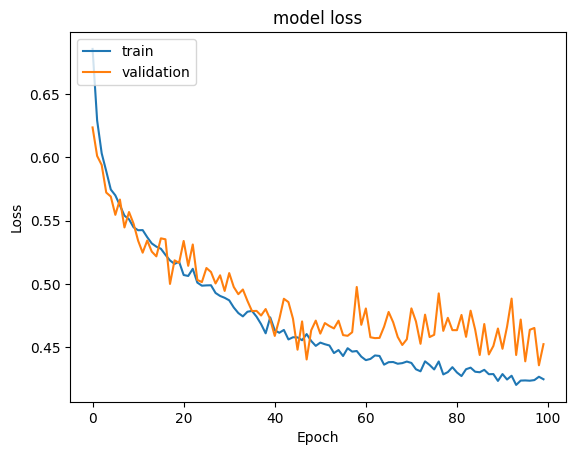

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model_5_train_perf = model_performance_classification(model_5, X_train_smote, y_train_smote)
model_5_train_perf


319/319 [==============================] - 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.831,0.831,0.832,0.831


In [ ]:
model_5_valid_perf = model_performance_classification(model_5, X_val, y_val)
model_5_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.782,0.782,0.830,0.797


In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_5.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred


319/319 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_5.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred


50/50 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      5096
           1       0.82      0.86      0.84      5096

    accuracy                           0.83     10192
   macro avg       0.83      0.83      0.83     10192
weighted avg       0.83      0.83      0.83     10192



In [ ]:
#classification report for validation set
cr = classification_report(y_val,y_val_pred>0.5)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1274
           1       0.48      0.73      0.58       326

    accuracy                           0.78      1600
   macro avg       0.70      0.76      0.72      1600
weighted avg       0.83      0.78      0.80      1600



**Confusion matrix**

Confusion matrix - Train Data



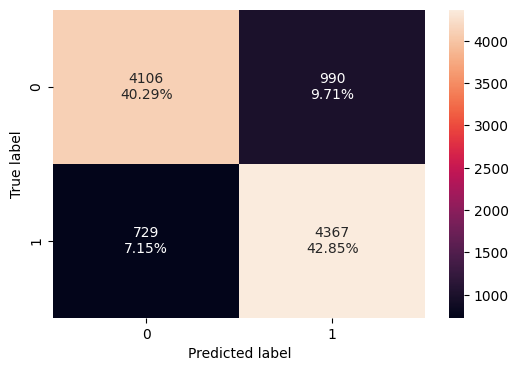

In [ ]:
print("Confusion matrix - Train Data",end="\n\n")
make_confusion_matrix(y_train_smote, y_train_pred)

Confusion matrix - Validation Data



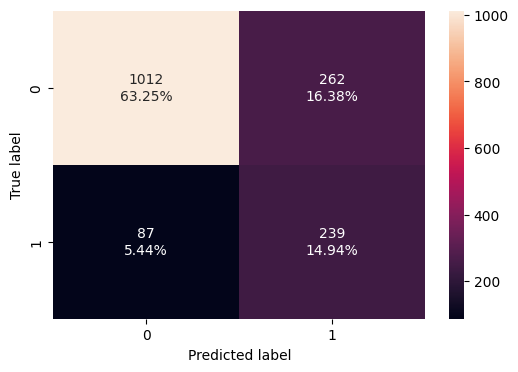

In [ ]:
print("Confusion matrix - Validation Data",end="\n\n")
make_confusion_matrix(y_val,y_val_pred)

* Adding dropout and batch regularization did not improve the performance.
* Let's try using kernel regularize, early stopping, and using a normal training dataset instead of SMOTE.

###Neural Network with Adam, Dropout, Batch Normalization, Kernel Regularization, Earlystopping)

* Let's use EarlyStopping to prevent overfitting by halting training when the model's performance on the validation set stops improving.
* Let's add kernel regularizers to prevent overfitting by penalizing large weights, encouraging the model to learn simpler patterns.
* We will also use Dropout and Batch Normalization.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_6 = Sequential()
model_6.add(Dense(64, activation='relu',kernel_initializer='he_normal',input_dim = X_train.shape[1],kernel_regularizer=l2(0.001)))
model_6.add(Dropout(0.4))
model_6.add(BatchNormalization())
model_6.add(Dense(32,kernel_initializer='he_normal',activation="relu", kernel_regularizer=l2(0.001)))
model_6.add(Dropout(0.2))
model_6.add(BatchNormalization())
model_6.add(Dense(16,kernel_initializer='he_normal',activation="relu", kernel_regularizer=l2(0.001)))
model_6.add(Dropout(0.2))
model_6.add(BatchNormalization())
model_6.add(Dense(8,kernel_initializer='he_normal',activation="relu", kernel_regularizer=l2(0.001)))
model_6.add(Dense(1,kernel_initializer='he_normal',activation="sigmoid"))


In [ ]:
optimizer = tf.keras.optimizers.Adam()   # defining Adam as the optimizer to be used
model_6.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#,callbacks=[early_stopping]
history_6 = model_6.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=64, epochs=100,callbacks=[early_stopping])
end=time.time()

Epoch 1/100
100/100 [==============================] - 3s 6ms/step - loss: 0.8807 - val_loss: 0.7688
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.7518 - val_loss: 0.6820
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6971 - val_loss: 0.6515
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6763 - val_loss: 0.6337
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6535 - val_loss: 0.6175
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6359 - val_loss: 0.6010
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6233 - val_loss: 0.5867
Epoch 8/100
100/100 [==============================] - 1s 5ms/step - loss: 0.6057 - val_loss: 0.5762
Epoch 9/100
100/100 [==============================] - 0s 5ms/step - loss: 0.5909 - val_loss: 0.5644
Epoch 10/100
100/100 [==============================] - 1s 5ms/step - loss: 0.5820 - val_lo

**Loss Function**

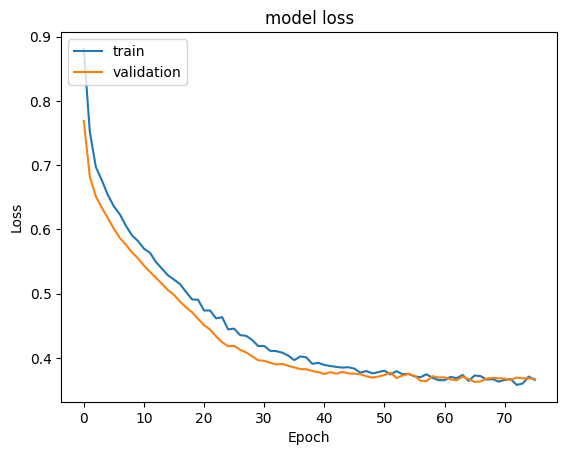

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model_6_train_perf = model_performance_classification(model_6, X_train, y_train)
model_6_train_perf


200/200 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.871,0.871,0.864,0.859


In [ ]:
model_6_valid_perf = model_performance_classification(model_6, X_val, y_val)
model_6_valid_perf

50/50 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.864,0.864,0.857,0.849


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network with SGD",
    "Neural Network with Adam",
    "Neural Network with Adam & Dropout",
    "Neural Network with SMOTE &SGD",
    "Neural Network with SMOTE & Adam",
    "Neural Network with SMOTE, Adam & Dropout",
    "Neural Network with Adam, Dropout, Batch Normalization, Kernel Regularization, Earlystopping)",
]

In [ ]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
     "Neural Network with SGD",
    "Neural Network with Adam",
    "Neural Network with Adam & Dropout",
    "Neural Network with SMOTE &SGD",
    "Neural Network with SMOTE & Adam",
    "Neural Network with SMOTE, Adam & Dropout",
    "Neural Network with Adam, Dropout, Batch Normalization, Kernel Regularization, Earlystopping)",
]

In [ ]:
models_train_comp_df

,Neural Network with SGD,Neural Network with Adam,Neural Network with Adam & Dropout,Neural Network with SMOTE &SGD,Neural Network with SMOTE & Adam,"Neural Network with SMOTE, Adam & Dropout","Neural Network with Adam, Dropout, Batch Normalization, Kernel Regularization, Earlystopping)"
Accuracy,0.828,0.894,0.863,0.744,0.905,0.831,0.871
Recall,0.828,0.894,0.863,0.744,0.905,0.831,0.871
Precision,0.809,0.890,0.854,0.744,0.905,0.832,0.864
F1 Score,0.803,0.888,0.851,0.743,0.905,0.831,0.859


In [ ]:
models_valid_comp_df

,Neural Network with SGD,Neural Network with Adam,Neural Network with Adam & Dropout,Neural Network with SMOTE &SGD,Neural Network with SMOTE & Adam,"Neural Network with SMOTE, Adam & Dropout","Neural Network with Adam, Dropout, Batch Normalization, Kernel Regularization, Earlystopping)"
Accuracy,0.821,0.845,0.856,0.739,0.795,0.782,0.864
Recall,0.821,0.845,0.856,0.739,0.795,0.782,0.864
Precision,0.798,0.832,0.845,0.795,0.814,0.830,0.857
F1 Score,0.790,0.833,0.841,0.757,0.803,0.797,0.849


In [ ]:
models_train_comp_df.loc["Recall"] - models_valid_comp_df.loc["Recall"]

Neural Network with SGD                                                                         0.008
Neural Network with Adam                                                                        0.049
Neural Network with Adam & Dropout                                                              0.007
Neural Network with SMOTE &SGD                                                                  0.005
Neural Network with SMOTE & Adam                                                                0.110
Neural Network with SMOTE, Adam & Dropout                                                       0.049
Neural Network with Adam, Dropout, Batch Normalization, Kernel Regularization, Earlystopping)   0.007
Name: Recall, dtype: float64

* Final Model: Neural Network with Adam, Dropout, Batch Normalization, Kernel Regularization, Early stopping.

* Reasoning:
  * When considering validation scores only, Model 6 outperforms others, suggesting its effectiveness in real-world applications and new data scenarios.
 * As the training recall(87.1) and validation recall(86.4) values are almost the same for Model 6( the difference is least as compared to other models), it demonstrates good performance in generalizing to unseen data.
 * In Model 6 Training set recall score( ~87%), indicates good performance in learning from the training data.


### Final Model

So we will be using model 6 as our final model and will use this model to predict the outcome.

In [ ]:
y_train_pred = model_6.predict(X_train)
y_valid_pred = model_6.predict(X_val)
y_test_pred = model_6.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5096
           1       0.79      0.50      0.61      1304

    accuracy                           0.87      6400
   macro avg       0.84      0.73      0.77      6400
weighted avg       0.86      0.87      0.86      6400



In [ ]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_val,y_val_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1274
           1       0.48      0.73      0.58       326

    accuracy                           0.78      1600
   macro avg       0.70      0.76      0.72      1600
weighted avg       0.83      0.78      0.80      1600



In [ ]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.47      0.58       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



* The weighted Recall on the test data is 0.86
* A recall score of 0.86 indicates that the model can correctly identify 86% of the customers who will leave the bank.



In [ ]:
# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

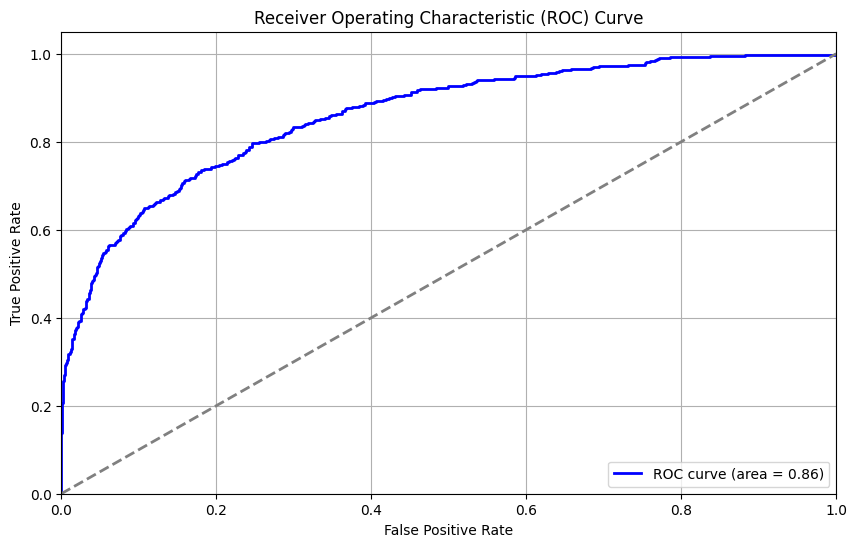

ROC AUC Score:  0.8608053353816065


In [ ]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print ROC AUC score
print("ROC AUC Score: ", roc_auc)

* As we can see from the graph that ROC AUC score is about 0.86 which is pretty good and indicates that the model has a good measure of separability, meaning it can distinguish well between the customers who will leave the bank and who will not across different thresholds.

## Actionable Insights and Business Recommendations

* Our neural network model has correctly identified approximately 86% of the customers leaving the bank in the next 6 months.
* The data indicates that most of the customers in the higher age group prefer to stay with the bank than younger ones.
* Customers with a higher account balance would be more likely to be exited as compared to the customers with a lower account balance.
* Active members are less likely to exit; there by business might find it useful to engage with inactive customers and encourage them via targetted incentives to transtion into active members.
* 33% of the customers who came from Germany have left the bank, followed by 16% and 17% from France and Spain respectively. Almost 1/3rd of German expatriates churning might indicate a certain behavioral or demographical attitude towards credit related banking.
* Female customers are more likely to churn. No reason was determined as to why gender would be factor in churing. Customer engagement and further data collection will help identify and resolve any geneder based churn issues.



